In [ ]:
## algorithm to classify EEG sleep data into 2 class(Wake and Sleep Stage 1)

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
from scipy import stats
import itertools
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC, LinearSVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import auc,accuracy_score
from sklearn.metrics import precision_recall_fscore_support,confusion_matrix
from sklearn.metrics import confusion_matrix


In [2]:
###################function to plot confusion matrix#####################################


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
###########################################################################################


In [3]:
file_location='C:\\Users\\BOL1KOR\\Desktop\\BCI Project\\Pickled Data\\Pickle_Files_3000'
os.chdir('C:\\Users\\BOL1KOR\\Desktop\\BCI Project\\Pickled Data\\Pickle_Files_3000') 


In [4]:
# remove xls for 2nd night of subject 13, as there was data loss 
# read in all xls, & then the sheets


#filename = "dfull_4001_4021.pkl" #C:\\Users\\DAR9KOR\\Desktop\\data\\HEALTHCARE\\EEG\\data\\pickled_data\\SC4001E0-PSG.pickle"
#with open(filename, 'rb') as f:
#    dfull = pickle.load(f)

dfull = pickle.load(open('dfull_4001_4021.pkl', 'rb'))


In [5]:
dfull

,pat_id,day,segment,epoch,delta,theta,alpha,beta,gamma,class
0,400,1,Seg1,1,0.703302,0.146348,0.099262,0.037832,0.018150,wake
1,400,1,Seg1,2,0.580056,0.166110,0.089898,0.058965,0.049103,wake
2,400,1,Seg1,3,0.767145,0.091504,0.058408,0.027586,0.024885,wake
3,400,1,Seg1,4,0.473933,0.231601,0.149178,0.069121,0.044365,wake
4,400,1,Seg1,5,0.357464,0.282076,0.195138,0.092718,0.051079,wake
5,400,1,Seg1,6,0.537196,0.225264,0.135940,0.061622,0.029787,wake
6,400,1,Seg1,7,0.563993,0.188081,0.102042,0.055294,0.049100,wake
7,400,1,Seg1,8,0.706624,0.132537,0.094655,0.028985,0.015225,wake
8,400,1,Seg1,9,0.434940,0.236239,0.168382,0.087273,0.039811,wake
9,400,1,Seg1,10,0.615944,0.173332,0.100698,0.038735,0.034301,wake


In [6]:
w=dfull[dfull['class']== 'wake'].shape[0]
s1=dfull[dfull['class']== 'sleep_stage_1'].shape[0]
s2=dfull[dfull['class']== 'sleep_stage_2'].shape[0]
print('wake = '+ str(w))
print('sleep_stage_1 = '+ str(s1))
print('sleep_stage_2 = '+ str(s2))

wake = 72391
sleep_stage_1 = 2804
sleep_stage_2 = 17799


In [7]:
## Label the data

In [8]:
dfull['class2'] = dfull['class']
dfull['class2'] = [0 if x == 'wake' else 1 for x in dfull['class2']]

In [9]:
## convert selected columns to categories 
dfull[['class','class2']] = dfull[['class','class2']].astype('str') 
dfull[['class','class2']] = dfull[['class','class2']].astype('category')

In [10]:
## Handling Imbalanced data - oversampling by SMOTE
## https://github.com/scikit-learn-contrib/imbalanced-learn

In [11]:
## Classification result before SMOTE
## using SVC

In [12]:
### create a smaller subset of data for testing algo
dw = dfull[(dfull['class'] == 'wake')]
d1 = dfull[(dfull['class'] == 'sleep_stage_1')]
d2 = dfull[(dfull['class'] == 'sleep_stage_2')]

# https://stackoverflow.com/questions/15923826/random-row-selection-in-pandas-dataframe
# Randomly sample n elements from your dataframe
d1_elements = d1
d2_elements = d2
dw_elements = dw


dn = pd.DataFrame()
dn = pd.concat([dw_elements, d1_elements, d2_elements],ignore_index=True)
#dn = pd.concat([dw_elements, d1_elements],ignore_index=True)
dn.shape[0]

92994

In [13]:
dn

,pat_id,day,segment,epoch,delta,theta,alpha,beta,gamma,class,class2
0,400,1,Seg1,1,0.703302,0.146348,0.099262,0.037832,0.018150,wake,0
1,400,1,Seg1,2,0.580056,0.166110,0.089898,0.058965,0.049103,wake,0
2,400,1,Seg1,3,0.767145,0.091504,0.058408,0.027586,0.024885,wake,0
3,400,1,Seg1,4,0.473933,0.231601,0.149178,0.069121,0.044365,wake,0
4,400,1,Seg1,5,0.357464,0.282076,0.195138,0.092718,0.051079,wake,0
5,400,1,Seg1,6,0.537196,0.225264,0.135940,0.061622,0.029787,wake,0
6,400,1,Seg1,7,0.563993,0.188081,0.102042,0.055294,0.049100,wake,0
7,400,1,Seg1,8,0.706624,0.132537,0.094655,0.028985,0.015225,wake,0
8,400,1,Seg1,9,0.434940,0.236239,0.168382,0.087273,0.039811,wake,0
9,400,1,Seg1,10,0.615944,0.173332,0.100698,0.038735,0.034301,wake,0


In [14]:
## create train-test data : 2 class
X = dn[['delta','theta','alpha','beta','gamma']]  ## feature Set 1
y = dn[['class2']]  # dfull[['class']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## normalize the data
#scaler = MinMaxScaler()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape

(74395, 5)

In [15]:
## SVC Model

In [ ]:
## Classsification result before applying SMOTE

In [16]:
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

'2018-11-27 11:49:51'

In [17]:
model_svc = SVC()
model_svc.fit(X_train_scaled, y_train)

C:\Users\BOL1KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

'2018-11-27 11:50:32'

In [19]:
# predict on test data - check metrics
y_pred = model_svc.predict(X_test_scaled)

Confusion matrix, without normalization
[[14015   477]
 [ 1235  2872]]
Normalized confusion matrix
[[0.97 0.03]
 [0.3  0.7 ]]


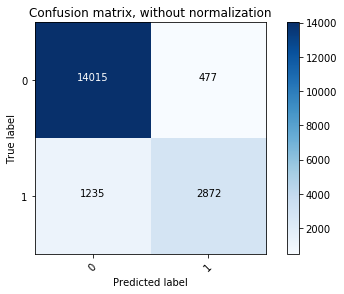

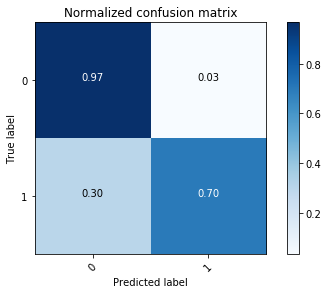

In [20]:
####    Compute confusion matrix     ####

class_names = ['0','1'] #['wake','sleep_stage_1','sleep_stage_2']  # wake, SS1, SS2  ; # '0','1','2'

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix : normalisation shows nan for class'0' no signal has class=0 as true label
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     14492
           1       0.86      0.70      0.77      4107

   micro avg       0.91      0.91      0.91     18599
   macro avg       0.89      0.83      0.86     18599
weighted avg       0.91      0.91      0.90     18599



In [22]:
print(accuracy_score(y_test,y_pred))

0.9079520404322813


In [23]:
## Classsification result after applying SMOTE

In [24]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

In [25]:
sampler = SMOTE()

In [26]:
model_smote = make_pipeline(sampler,SVC())
model_smote.fit(X_train_scaled,y_train)  ## this does not look like upsampled data


## not by sreetama ##
# https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/combine/plot_comparison_combine.html#sphx-glr-auto-examples-combine-plot-comparison-combine-py
# this link shows separate commands:
#   sampling.fit_resample : to resample the data
#   make_pipeline : Pipeline of transforms and resamples with a final estimator.
## to do ##
# resample the training set, then scale the data & run the algo
# check if it is possible to see the change in dataset size

C:\Users\BOL1KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BOL1KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('smote', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=None, ratio=None,
   sampling_strategy='auto', svm_estimator='deprecated')), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [30]:
y_pred = model_smote.predict(X_test_scaled)

Confusion matrix, without normalization
[[12866  1626]
 [  528  3579]]
Normalized confusion matrix
[[0.89 0.11]
 [0.13 0.87]]


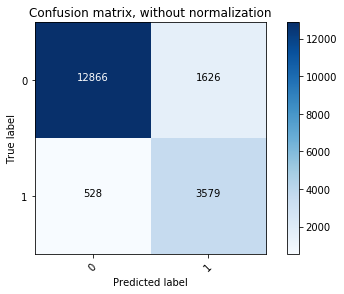

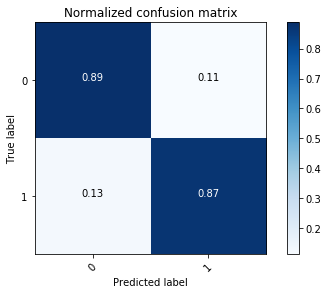

In [31]:
####    Compute confusion matrix     ####

class_names = ['0','1'] #['wake','sleep_stage_1','sleep_stage_2']  # wake, SS1, SS2  ; # '0','1','2'

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix : normalisation shows nan for class'0' no signal has class=0 as true label
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     14492
           1       0.69      0.87      0.77      4107

   micro avg       0.88      0.88      0.88     18599
   macro avg       0.82      0.88      0.85     18599
weighted avg       0.90      0.88      0.89     18599



In [34]:
print(accuracy_score(y_test,y_pred))

0.8841873218990268


In [ ]:
## RF Model ##

In [ ]:
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 100) ## max_depth=5, random_state=0,verbose =0)  
# max_features=2, min_samples_split=4, n_estimators=50, min_samples_leaf=2
model_rf.fit(X_train_scaled, y_train)

In [ ]:
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# predict on test data - check metrics
y_pred = model_rf.predict(X_test_scaled)

#df_ypred = pd.concat([df_ypred,pd.DataFrame(y_pred)], axis=1, ignore_index = True)


In [ ]:
####    Compute confusion matrix     ####

class_names = ['0','1'] #['wake','sleep_stage_1','sleep_stage_2']  # wake, SS1, SS2  ; # '0','1','2'

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix : normalisation shows nan for class'0' no signal has class=0 as true label
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

In [ ]:
print(accuracy_score(y_test,y_pred))

In [23]:
## Classsification result after applying SMOTE

In [24]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

In [25]:
sampler = SMOTE()

In [26]:
model_smote = make_pipeline(sampler,SVC())
model_smote.fit(X_train_scaled,y_train)

C:\Users\BOL1KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BOL1KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('smote', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=None, ratio=None,
   sampling_strategy='auto', svm_estimator='deprecated')), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [30]:
y_pred = model_smote.predict(X_test_scaled)

Confusion matrix, without normalization
[[12866  1626]
 [  528  3579]]
Normalized confusion matrix
[[0.89 0.11]
 [0.13 0.87]]


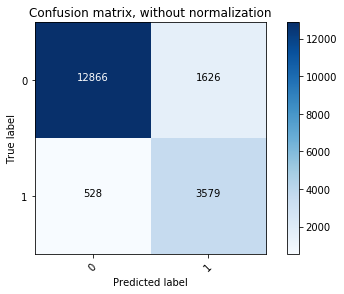

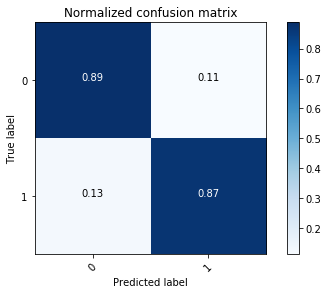

In [31]:
####    Compute confusion matrix     ####

class_names = ['0','1'] #['wake','sleep_stage_1','sleep_stage_2']  # wake, SS1, SS2  ; # '0','1','2'

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix : normalisation shows nan for class'0' no signal has class=0 as true label
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     14492
           1       0.69      0.87      0.77      4107

   micro avg       0.88      0.88      0.88     18599
   macro avg       0.82      0.88      0.85     18599
weighted avg       0.90      0.88      0.89     18599



In [34]:
print(accuracy_score(y_test,y_pred))

0.8841873218990268


In [ ]:
###GradientBoosting Classifier###

In [ ]:
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
model_gb = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.25)
model_gb.fit(X_train_scaled, y_train)

In [ ]:
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# predict on test data - check metrics
y_pred = model_gb.predict(X_test_scaled)

df_ypred = pd.concat([df_ypred,pd.DataFrame(y_pred)], axis=1, ignore_index = True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))

In [ ]:
####    Compute confusion matrix     ####

class_names = ['0','1'] #['wake','sleep_stage_1','sleep_stage_2']  # wake, SS1, SS2  ; # '0','1','2'

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix : normalisation shows nan for class'0' no signal has class=0 as true label
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
## Neural Network Classifier ##

In [ ]:
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
model_mlp = MLPClassifier(hidden_layer_sizes = 8, activation = 'logistic', solver = 'sgd', learning_rate = 'adaptive', random_state = 45, max_iter = 500, learning_rate_init = 1, momentum = 0.9)
model_mlp.fit(X_train_scaled,y_train)

In [ ]:
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# predict on test data - check metrics
y_pred_mlp = model_mlp.predict(X_test_scaled)

df_ypred = pd.concat([df_ypred,pd.DataFrame(y_pred)], axis=1, ignore_index = True)

In [ ]:
####    Compute confusion matrix     ####

class_names = ['0','1'] #['wake','sleep_stage_1','sleep_stage_2']  # wake, SS1, SS2  ; # '0','1','2'

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix : normalisation shows nan for class'0' no signal has class=0 as true label
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
## KNN Model

In [ ]:
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
model_knn = KNeighborsClassifier(metric = 'euclidean')
model_knn.fit(X_train_scaled, y_train)

In [ ]:
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# predict on test data - check metrics
y_pred = model_knn.predict(X_test_scaled)

df_ypred = pd.concat([df_ypred,pd.DataFrame(y_pred)], axis=1, ignore_index = True)

In [ ]:
####    Compute confusion matrix     ####

class_names = ['0','1'] #['wake','sleep_stage_1','sleep_stage_2']  # wake, SS1, SS2  ; # '0','1','2'

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix : normalisation shows nan for class'0' no signal has class=0 as true label
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
## Decision Tree

In [ ]:
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train_scaled, y_train)

In [ ]:
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# predict on test data - check metrics
y_pred = model_dtc.predict(X_test_scaled)

df_ypred = pd.concat([df_ypred,pd.DataFrame(y_pred)], axis=1, ignore_index = True)

In [ ]:
####    Compute confusion matrix     ####

class_names = ['0','1'] #['wake','sleep_stage_1','sleep_stage_2']  # wake, SS1, SS2  ; # '0','1','2'

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix : normalisation shows nan for class'0' no signal has class=0 as true label
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:

df_ypred.columns = ['y_test','ypred_svc','ypred_rf','ypred_gb','ypred_mlp','ypred_knn','ypred_dt']


In [ ]:
df_ypred.to_excel("ypred_fullsleep_optimized.xlsx", index=False)